# 파이토치 패키지의 기본 구성

### 1. torch

메인 네임스페이스입니다. 

텐서 등의 다양한 수학 함수가 포함되어져 있으며 Numpy와 유사한 구조를 가집니다.

### 2. torch.autograd

자동 미분을 위한 함수들이 포함되어져 있습니다.

자동 미분의 on/off를 제어하는 콘텍스트 매니저(enable_grad/no_grad)나 자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 'Function' 등이 포함되어져 있습니다.

### 3. torch.nn

신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의되어져 있습니다. 

예를 들어 RNN, LSTM과 같은 레이어, ReLU와 같은 활성화 함수, MSELoss와 같은 손실 함수들이 있습니다.

### 4. torch.optim

확률적 경사 하강법(Stochastic Gradient Descent, SGD)를 중심으로 한 파라미터 최적화 알고리즘이 구현되어져 있습니다.

### 5. torch.utils.data

SGD의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수가 포함되어져 있습니다.

### 6. torch.onnx

ONNX(Open Neural Network Exchange)의 포맷으로 모델을 익스포트(export)할 때 사용합니다.
ONNX는 서로 다른 딥 러닝 프레임워크 간에 모델을 공유할 때 사용하는 포맷입니다.

# 텐서 조작하기(Tensor Manipulation)

## 1. 벡터, 행렬 그리고 텐서(Vector, Matrix and Tensor)

### 1) 벡터, 행렬, 텐서 그림으로 이해하기

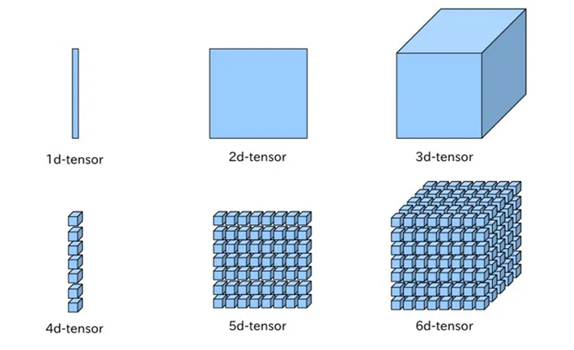

### 2) PyTorch Tensor Shape Convention

- **2D Tensor(Typical Simple Setting)**

- |t| = (Batch size, dim)

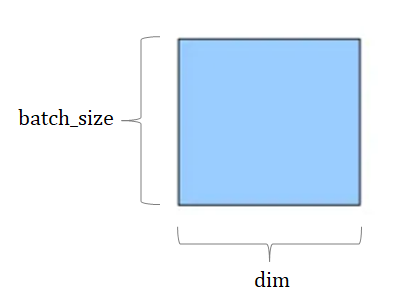

- **3D Tensor(Typical Computer Vision) - 비전 분야에서의 3차원 텐서**

- |t| = (batch size, width, height)

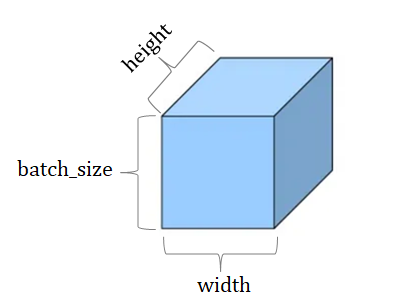

- **3D Tensor(Typical Natural Language Processing) - NLP 분야에서의 3차원 텐서**

- |t| = (batch size, length, dim)

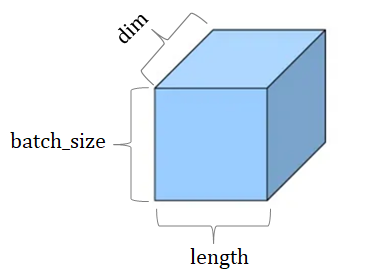

### NLP 분야의 3D 텐서 예제로 이해하기

```
[[나는 사과를 좋아해], [나는 바나나를 좋아해], [나는 사과를 싫어해], [나는 바나나를 싫어해]]
```

In [20]:
data = [
    ['나는', '사과를', '좋아해'],
    ['나는', '바나나를', '좋아해'],
    ['나는', '사과를', '싫어해'],
    ['나는', '바나나를', '싫어해']
]

In [21]:
word2vec = {
    '나는': [0.1, 0.2, 0.9],
    '사과를': [0.3, 0.5, 0.1],
    '바나나를': [0.3, 0.5, 0.2],
    '좋아해': [0.7, 0.6, 0.5],
    '싫어해': [0.5, 0.6, 0.7]
}

In [31]:
vectorized = [[word2vec[word] for word in sentence] for sentence in data]

# vectorized = []
# temp = []
# for sentence in data:
#     for word in sentence:
#         print(word)
#         temp.append(word2vec[word])
#     vectorized.append(temp)
#     temp = []

In [32]:
for i, sent in enumerate(vectorized, 1):
    print(f"문장원본 {i}:\n", data[i-1], "\n")
    print(f"문장 {i}:\n", sent, "\n")

문장원본 1:
 ['나는', '사과를', '좋아해'] 

문장 1:
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]] 

문장원본 2:
 ['나는', '바나나를', '좋아해'] 

문장 2:
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]] 

문장원본 3:
 ['나는', '사과를', '싫어해'] 

문장 3:
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]] 

문장원본 4:
 ['나는', '바나나를', '싫어해'] 

문장 4:
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]] 



### 2. 넘파이로 텐서 만들기(벡터와 행렬 만들기)

In [34]:
import numpy as np

1) 1D with Numpy

In [35]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
# 파이썬으로 설명하면 List를 생성해서 np.array로 1차원 array로 변환함.
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [37]:
print('Rank of t: ', t.ndim)    #차원
print('Shape of t: ', t.shape)  #각 차원의 크기
print('Type of t: ', t.dtype)   #데이터 타입

Rank of t:  1
Shape of t:  (7,)
Type of t:  float64


In [38]:
print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1]) # 인덱스를 통한 원소 접근

t[0] t[1] t[-1] =  0.0 1.0 6.0


2) 2D with Numpy

In [39]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [40]:
print('Rank  of t: ', t.ndim)
print('Shape of t: ', t.shape)
print('Type of t: ', t.dtype)

Rank  of t:  2
Shape of t:  (4, 3)
Type of t:  float64


### 3. 파이토치 텐서 선언하기(PyTorch Tensor Allocation)

In [41]:
import torch

1) 1D with PyTorch

In [42]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [44]:
print(t.dim())  # rank. 즉, 차원
print(t.shape)  # shape
print(t.size()) # shape
print(t.type()) # 데이터 타입

1
torch.Size([7])
torch.Size([7])
torch.FloatTensor


2) 2D with PyTorch

In [45]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [46]:
print(t.dim())  # rank. 즉, 차원
print(t.size()) # shape

2
torch.Size([4, 3])


In [47]:
print(t[:, 1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 첫번째 것만 가져온다.
print(t[:, 1].size()) # ↑ 위의 경우의 크기

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [48]:
print(t[:, :-1])

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


3) 브로드캐스팅(Broadcasting)

In [49]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [ ]:
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


In [51]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


### 4) 자주 사용되는 기능들

1) 행렬 곱셈과 곱셈의 차이(Matrix Multiplication Vs. Multiplication)

In [52]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [53]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


2) 평균(Mean)

In [54]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [60]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print(t.mean())

tensor([[1., 2.],
        [3., 4.]])
tensor(2.5000)


In [61]:
print(t.mean(dim=0))
print(t.mean(dim=1))

tensor([2., 3.])
tensor([1.5000, 3.5000])


3) 덧셈(Sum)

In [62]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [63]:
print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 행을 제거
print(t.sum(dim=1)) # 열을 제거
print(t.sum(dim=-1)) # 열을 제거

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


4) 최대(Max)와 아그맥스(ArgMax)

In [64]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [65]:
print(t.max()) # Returns one value: max

tensor(4.)


In [66]:
print(t.max(dim=0)) # Returns two values: max and argmax

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [67]:
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


In [68]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


5) 뷰(View) - 원소의 수를 유지하면서 텐서의 크기 변경. 매우 중요!

In [69]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)

In [70]:
print(ft.shape)

torch.Size([2, 2, 3])


5-1) 3차원 텐서에서 2차원 텐서로 변경

In [71]:
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


5-2) 3차원 텐서의 크기 변경

In [72]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


6) 스퀴즈(Squeeze) - 1인 차원을 제거한다.

In [73]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [74]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


7) 언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원을 추가한다.

In [75]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [76]:
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [77]:
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [78]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


8) 타입 캐스팅(Type Casting)

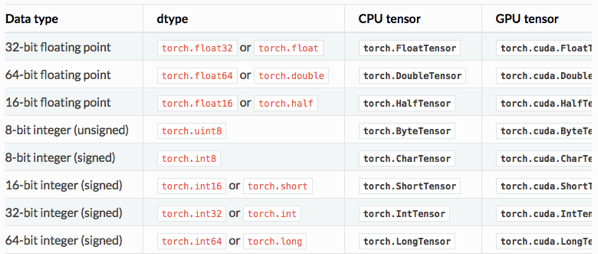

In [79]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [80]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [81]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [82]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


9) 연결하기(concatenate)

In [83]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [84]:
print(torch.cat([x, y], dim=0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [85]:
print(torch.cat([x, y], dim=1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


10) 스택킹(Stacking)

In [86]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [87]:
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [88]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [89]:
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


11) ones_like와 zeros_like - 0으로 채워진 텐서와 1로 채워진 텐서

In [90]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [91]:
print(torch.ones_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [92]:
print(torch.zeros_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 0으로 채우기

tensor([[0., 0., 0.],
        [0., 0., 0.]])


12) In-place Operation (덮어쓰기 연산)

In [93]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [94]:
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [95]:
print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])
